# Bank Marketing Classification

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

from collections import Counter
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

## 2. Data Preprocessing and Visualization

### 2.1. Load Data

In [2]:
# Load dataframe (df) into appropriate format
df = pd.read_csv('bank-additional-full.csv', sep=';')

### 2.2. Analyze Data

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
# Brief info about dataframe - non-null values and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Check for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
# # -- Drop/impute missing data (if required) --

# # Drop rows with missing values
# df = df.dropna(axis=0, how='any')

# # ['mean', 'median', 'most_frequent', 'constant']
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
# imputer.fit_transform(df)
# df = imputer.transform(df)

# df.isnull().sum()

In [7]:
# Dataframe statistics on quantitative (numerical) values
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
# Get values for matrix of features (X) and dependent variable (y)
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

print(X.shape, y.shape)

(41188, 20) (41188,)


### 2.3. Visualize Data

#### **Order of Categories**

In [9]:
# Occupation of Clients
occupation_order = ['admin.','blue-collar','entrepreneur','housemaid','management',
             'retired','self-employed','services','student','technician',
             'unemployed','unknown']
# Education Levels of Clients
education_order = ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 
                   'professional.course', 'university.degree', 'illiterate',
                   'unknown']

#### Age Distribution

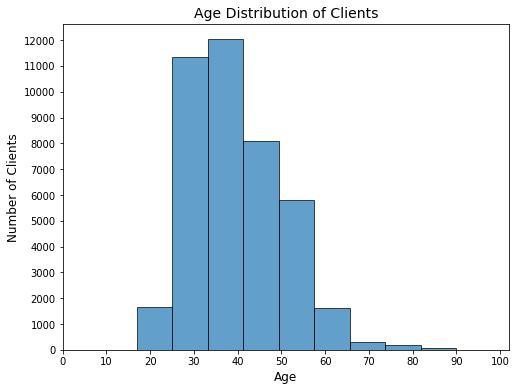

In [10]:
# Define figure
age_dist = plt.figure(figsize=(8, 6))

# Age distribution histogram
age_dist = plt.hist(x=df['age'], alpha=0.7, edgecolor='black')
# Adjust X and Y-Axes ranes
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(0, 13000, 1000))
# Plot title and labels
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.title('Age Distribution of Clients', fontsize=14)

# Show figure
plt.show()

#### Occupations of Clients

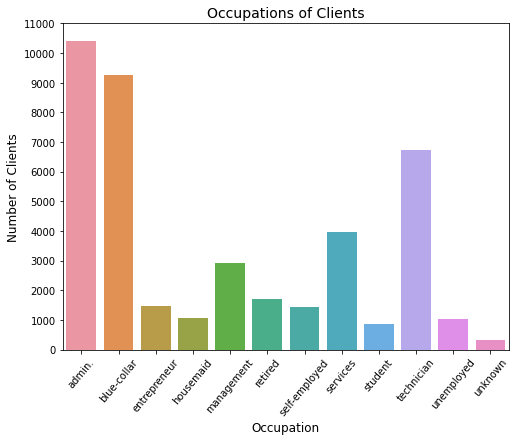

In [11]:
# Define figure
occupations = plt.figure(figsize=(8, 6))

# Occupation of clients
occupations = sns.countplot(x=df['job'], order=occupation_order)
# Adjust X and Y-Axes
plt.xticks(rotation=50)
plt.yticks(np.arange(0, 12000, 1000))
# Plot title and labels
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.title('Occupations of Clients', fontsize=14)

# Show figure
plt.show()

#### Education Levels

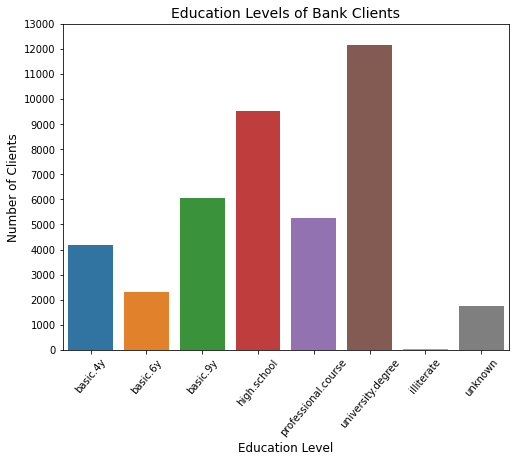

In [12]:
# Define figure
education_levels = plt.figure(figsize=(8, 6))

# Education Levels
education_levels = sns.countplot(x=df['education'], order=education_order)
# Adjust X and Y-Axes
plt.xticks(rotation=50)
plt.yticks(np.arange(0, 14000, 1000))
# Plot title and labels
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.title('Education Levels of Bank Clients', fontsize=14)

# Show figure
plt.show()

#### Marital Status

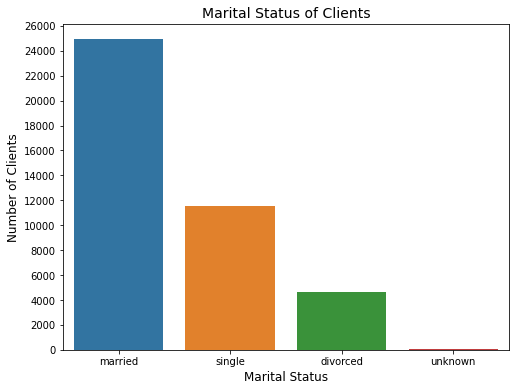

In [13]:
# Define figure
plt.figure(figsize=(8, 6))

# Marital status
sns.countplot(x=df['marital'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 28000, 2000))
# Plot title and labels
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.title('Marital Status of Clients', fontsize=14)

# Show figure
plt.show()

#### Types of Loans

In [14]:
# Dictionaries for subplot - Types of loans
default_loan = Counter(df['default'])
housing_loan = Counter(df['housing'])
personal_loan = Counter(df['loan'])

# Print number of clients per results
print("Default Loan: " + str(default_loan))
print("Housing Loan: " + str(housing_loan))
print("Personal Loan: " + str(personal_loan))

Default Loan: Counter({'no': 32588, 'unknown': 8597, 'yes': 3})
Housing Loan: Counter({'yes': 21576, 'no': 18622, 'unknown': 990})
Personal Loan: Counter({'no': 33950, 'yes': 6248, 'unknown': 990})


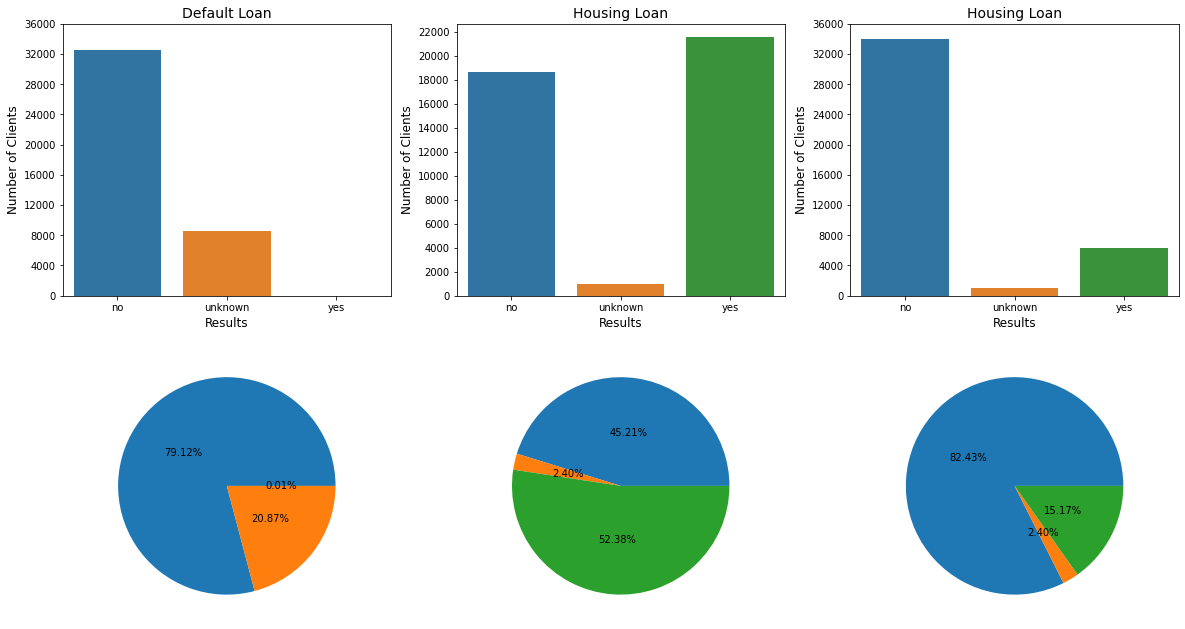

In [15]:
# Define subplot
loans = plt.figure(figsize=(20, 11))

# Default Loan - Bar Chart
ax1 = loans.add_subplot(2, 3, 1)
ax1 = sns.countplot(x=df['default'], palette="tab10", order=['no', 'unknown', 'yes'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 40000, 4000))
# Plot title and labels
plt.xlabel('Results', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.title('Default Loan', fontsize=14)

# Housing Loan - Bar Chart
ax2 = loans.add_subplot(2, 3, 2)
ax2 = sns.countplot(x=df['housing'], palette="tab10", order=['no', 'unknown', 'yes'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 24000, 2000))
# Plot title and labels
plt.xlabel('Results', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.title('Housing Loan', fontsize=14)

# Personal Loan - Bar Chart
ax3 = loans.add_subplot(2, 3, 3)
ax3 = sns.countplot(x=df['loan'], palette="tab10", order=['no', 'unknown', 'yes'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 40000, 4000))
# Plot title and labels
plt.xlabel('Results', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.title('Housing Loan', fontsize=14)

# Default Loan - Pie Chart
ax4 = loans.add_subplot(2, 3, 4)
ax4 = plt.pie(x=[default_loan['no'], default_loan['unknown'], default_loan['yes']], 
              autopct="%.2f%%", pctdistance=0.5)

# Housing Loan - Pie Chart
ax5 = loans.add_subplot(2, 3, 5)
ax5 = plt.pie(x=[housing_loan['no'], housing_loan['unknown'], housing_loan['yes']], 
              autopct="%.2f%%", pctdistance=0.5)

# Personal Loan - Pie Chart
ax6 = loans.add_subplot(2, 3, 6)
ax6 = plt.pie(x=[personal_loan['no'], personal_loan['unknown'], personal_loan['yes']], 
              autopct="%.2f%%", pctdistance=0.5)

# Show subplot
plt.show()

#### Classication Results

###### Has the client subscribed to a term deposit?

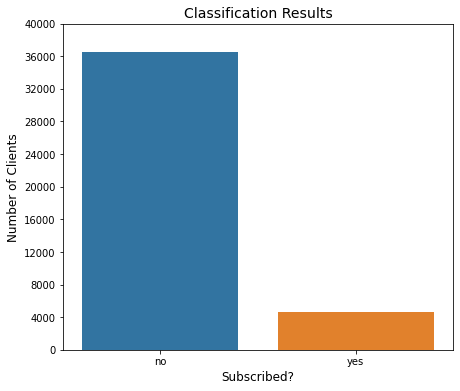

In [16]:
# Define subplot
subscribed_results = plt.figure(figsize=(7, 6))

# Classification Results - Bar Chart
subscribed_results = sns.countplot(x=df['y'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 44000, 4000))
# Plot title and labels
plt.xlabel('Subscribed?', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.title('Classification Results', fontsize=14)

# Show subplot
plt.show()

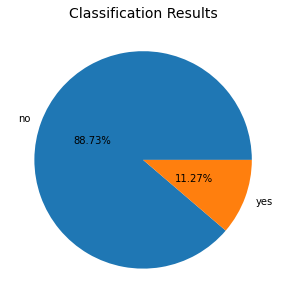

In [17]:
# Define figure
subscribed_pie = plt.figure(figsize=(6, 5))

# Classification Results - Pie Chart
results_labels = ['no', 'yes']
overall_results = Counter(df['y'])
subscribed_pie = plt.pie(x=[overall_results['no'], overall_results['yes']], 
        labels=results_labels, autopct="%.2f%%", pctdistance=0.5)
# Plot title
plt.title('Classification Results', fontsize=14)

# Show figure
plt.show()

#### Pairwise relationships between features

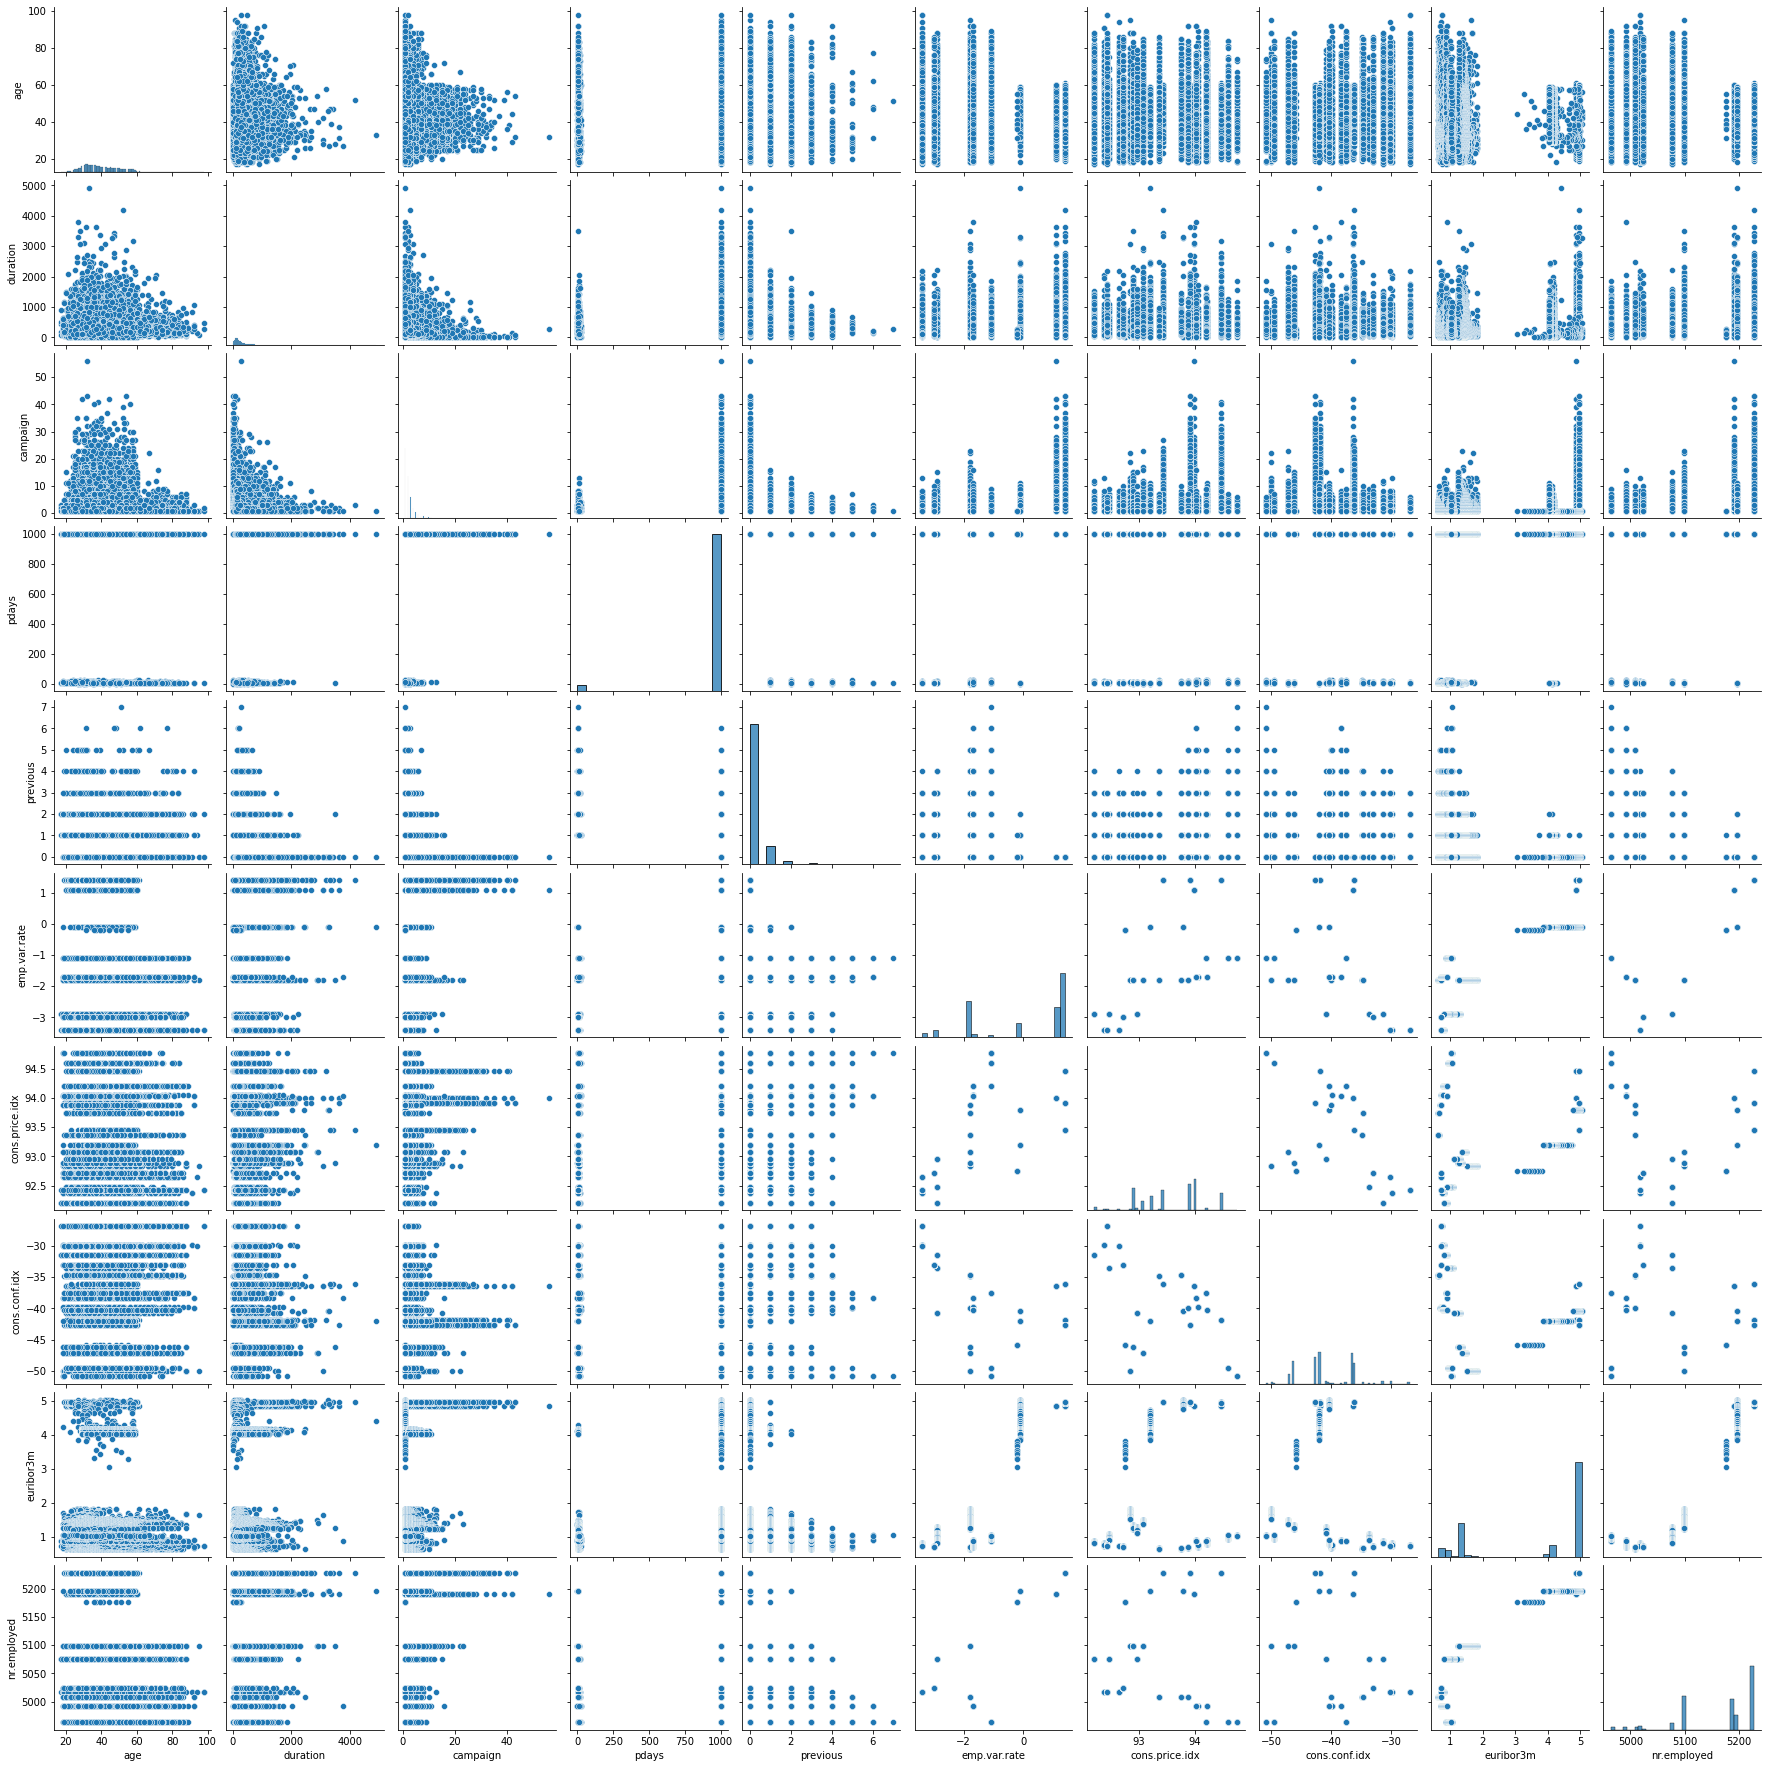

In [18]:
# Pairwise distributions
sns.pairplot(df)

# Show figure
plt.show()

#### Correlation Map

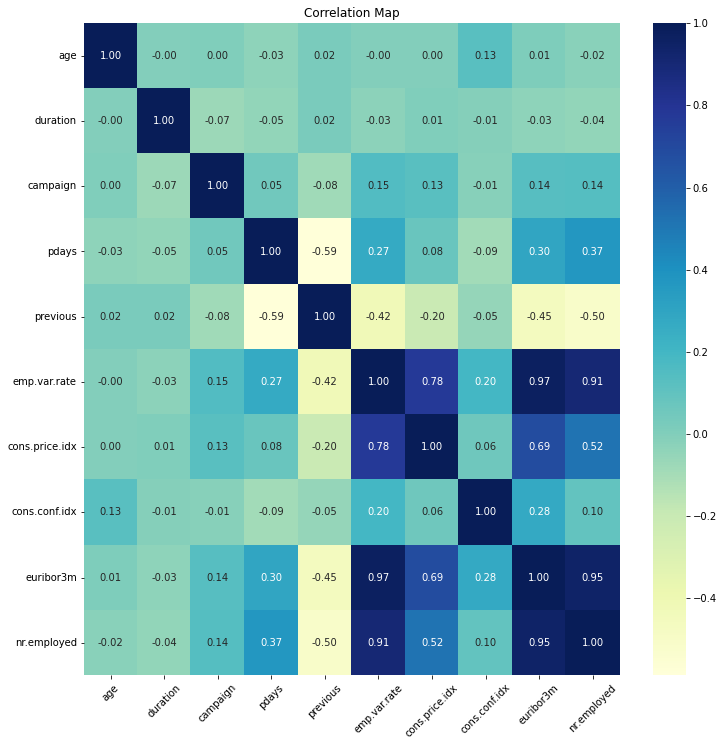

In [19]:
# Define correlation map figure
plt.figure(figsize=(12,12))

# Correlation Map
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt = ".2f")
# Adjust X and Y-Axes
plt.xticks(rotation=45)
plt.yticks(rotation=0)
# Plot title
plt.title('Correlation Map')

# Show figure
plt.show()

###  2.4. Feature Engineering

In [20]:
# Label Encode Categorical Columns
le = LabelEncoder()
le_columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 14]

# Apply Label Encoding
for i in le_columns:
  X[:, i] = le.fit_transform(X[:, i])

# Label Encode the Dependent Variable
y = le.fit_transform(y)

# Print results
print(X[:, 1:14])
print(y)

[[3 1 0 ... 1 999 0]
 [7 1 3 ... 1 999 0]
 [7 1 3 ... 1 999 0]
 ...
 [5 1 6 ... 2 999 0]
 [9 1 5 ... 1 999 0]
 [5 1 5 ... 3 999 1]]
[0 0 0 ... 0 1 0]


In [21]:
X

array([[56, 3, 1, ..., -36.4, 4.857, 5191.0],
       [57, 7, 1, ..., -36.4, 4.857, 5191.0],
       [37, 7, 1, ..., -36.4, 4.857, 5191.0],
       ...,
       [56, 5, 1, ..., -50.8, 1.028, 4963.6],
       [44, 9, 1, ..., -50.8, 1.028, 4963.6],
       [74, 5, 1, ..., -50.8, 1.028, 4963.6]], dtype=object)

In [22]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [23]:
# Split dataframe (df) into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

In [24]:
# Feature Scale numerical columns
numerical_columns = [0, 10, 11, 12, 13, 15, 16, 17, 18, 19]
# Apply Feature Scaling - Standardization
sc = StandardScaler()
X_train[:, numerical_columns] = sc.fit_transform(X_train[:, numerical_columns])
X_test[:, numerical_columns] = sc.transform(X_test[:, numerical_columns])

In [25]:
# Variance Threshold for useful features (if required)
print("Original feature shape:", X.shape)

# Min Threshold = 0.13
selector = VarianceThreshold(threshold=0.13)
X_new = selector.fit_transform(X)
fs = SelectKBest(score_func = f_classif, k = 10)
X_selected = fs.fit_transform(X, y)

# Print dimensions of old and new matrices of features
print("New feature shape:", X_new.shape)
print('X_selected shape:', X_selected.shape)

Original feature shape: (41188, 20)
New feature shape: (41188, 20)
X_selected shape: (41188, 10)


## 3. Define and Evalutate Models

In [26]:
# Logistic Regression (LR)
from sklearn.linear_model import LogisticRegression
# Decision Tree (DT)
from sklearn.tree import DecisionTreeClassifier
# Random Forest (RF)
from sklearn.ensemble import RandomForestClassifier
# XGBoost (XGB)
import xgboost as xgb
from xgboost import XGBClassifier
# LightGBM (LGB)
import lightgbm as lgb
from lightgbm import LGBMClassifier
# Deep Neural Network (DNN)
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Additional Libraries
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

#### **Set Scoring Metric**

In [27]:
# -- Accuracy --
metric = 'accuracy'

# -- Region of Convergence - Area Under Curve (ROC_AUC) --
# metric = 'roc_auc'

#### **Important Functions**

In [28]:
# Feature importance (reference: Machine Learning Mastery)
def feature_importance(model):
  """
  model - ML model implemented
  """

  # Define figure
  fig = plt.figure(figsize=(6, 6))

  # Summarize feature importance
  if (model == lr_clf):
    model_importance = model.coef_[0]
    for i, v in enumerate(model_importance):
      print('Feature: %0d, Score: %.5f' % (i,v))

      # Plot results
      fig = plt.bar([x for x in range(len(model_importance))], model_importance)
      # Adjust X and Y-Axis ranges
      plt.xticks(np.arange(0, 20, 1))
      plt.yticks(np.arange(-1.25, 1.5, 0.25))
      # Plot title and labels
      plt.xlabel("Feature (index)", fontsize=12)
      plt.ylabel("Score", fontsize=12)
      plt.title("Feature Importance")
  else:
    model_importance = model.feature_importances_
    for i, v in enumerate(model_importance):
      print('Feature: %0d, Score: %.5f' % (i,v))

      # Plot results
      fig = plt.bar([x for x in range(len(model_importance))], model_importance)
      # Adjust X and Y-Axis ranges
      plt.xticks(np.arange(0, 20, 1))
      # plt.yticks(np.arange(0, 1.5, 0.25))
      # Plot title and labels
      plt.xlabel("Feature (index)", fontsize=12)
      plt.ylabel("Score", fontsize=12)
      plt.title("Feature Importance")
  
  # Return figure - to show
  return fig

In [29]:
# Plot confusion matrix
def plot_confusion_matrix(model, X_text=X_test, y_test=y_test):
  """
  model  - ML model implemented
  X_test - Matrix of features for test set
  y_test - Dependent (target) variable for test set
  """
  # Define confusion matrix figure
  cm = plt.figure(figsize=(7,7))

  # Plot the confusion matrix
  # Top Left:     TN = cm[0][0] - True Negative
  # Top Right:    FP = cm[0][1] - False Positive
  # Bottom Left:  FN = cm[1][0] - False Negative
  # Bottom Right: TP = cm[1][1] - True Positive
  cm = plot_confusion_matrix(model, X_test, y_test)
  
  # Return figure - to show
  return cm

In [30]:
# Summarize prediction results
def summarize_results(model, metric=metric, threshold=0.5):
  """
  model     - Summarize results for Machine Learning model
  metric    - Scoring metric (Accuracy or ROC AUC)
  threshold - Value (x100%) indicating success or failure (depends on requirements)
  """
  
  # Print appropriate scores
  if ((metric == "accuracy") or (metric == "roc_auc")):
    # Test/Validation Accuracy (MAE)
    print('Validation Accuracy: %.3f%%' % (accuracy_score(y_test, model) * 100))
    # Region of Convergence, Area Under Curve (ROC AUC)
    print('Validation ROC AUC: %.3f%%' % (roc_auc_score(y_test, model) * 100))
  else:
    print("Invalid scoring metric!")
    return None
  
  # Plot the confusion matrix
  print('\nConfusion Matrix: ')
  cm = confusion_matrix(model, y_test)
  print(cm)
  print('')

  # -- For Binary Classification (two classes): --
  # Top Left:     TN = cm[0][0] - True Negative
  # Top Right:    FP = cm[0][1] - False Positive
  # Bottom Left:  FN = cm[1][0] - False Negative
  # Bottom Right: TP = cm[1][1] - True Positive

  # accuracy = (TP + TN)/(TN + FP + FN + TP)
  # precision = TP/(TP + FP)
  # recall = TP/(TP + FN)
  # f1_score = (2 * precision * recall)/(precision + recall)
  # support = Number of occurrences of each class in lr_pred

  # Print Classification Report (brief summary of results)
  print('Classification Report: ')
  print(classification_report(y_test, model))

In [31]:
# Apply k-Fold Cross Validation on the training set
def k_fold(model, n=10):
  """
  model - Machine Learning model implemented
  n     - number of k-Folds (default 10)
  """
  
  # Lists of values
  accuracy_means, accuracy_stds, accuracy_mins, accuracy_maxs = [], [], [], []  # Accuracy Scoring
  roc_auc_means, roc_auc_stds, roc_auc_mins, roc_auc_maxs = [], [], [], []  # ROC AUC Scoring
  # Cross validate for n k-folds (RepeatedStratifiedKFold - 3 repeats each)
  for i in range(2, 2+n):
    cv = RepeatedStratifiedKFold(n_splits = i, n_repeats=3, random_state = 0)
    # Collect appropriate Key Performance Indicator (KPI) results per k-Fold
    accuracy_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    roc_auc_scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
    
    # Force scores to be positive
    accuracy_scores = abs(accuracy_scores)
    roc_auc_scores = abs(roc_auc_scores)

    # Print R^2 scores
    print('')
    print('-- Fold: %d --' % (i-1))
    print('')
    print('Accuracy Scoring:')
    print("Mean: %.3f%%" % (np.mean(accuracy_scores) * 100))
    print("Std: +/- %.3f%%" % (np.std(accuracy_scores) * 100))
    print("Min: %.3f%%" % (np.min(accuracy_scores) * 100))
    print("Max: %.3f%%" % (np.max(accuracy_scores) * 100))
    
    # Print RMSE scores
    print('')
    print('ROC AUC Scoring:')
    print("Mean: %.3f%%" % (np.mean(roc_auc_scores) * 100))
    print("Std: +/- %.3f%%" % (np.std(roc_auc_scores) * 100))
    print("Min: %.3f%%" % (np.min(roc_auc_scores) * 100))
    print("Max: %.3f%%" % (np.max(roc_auc_scores) * 100))
    print('')
    
    # Append Accuracy scores
    accuracy_means.append(np.mean(accuracy_scores))
    accuracy_stds.append(np.std(accuracy_scores))
    accuracy_mins.append(np.min(accuracy_scores))
    accuracy_maxs.append(np.max(accuracy_scores))

    # Append ROC AUC scores
    roc_auc_means.append(np.mean(roc_auc_scores))
    roc_auc_stds.append(np.std(roc_auc_scores))
    roc_auc_mins.append(np.min(roc_auc_scores))
    roc_auc_maxs.append(np.max(roc_auc_scores))

  # Define subplot figure
  k_fold_results = plt.figure(figsize=(15, 10))

  # Plot Accuracy scores per k-fold:
  ax1 = k_fold_results.add_subplot(2, 2, 1)
  ax1.plot(np.arange(1,1+n), accuracy_means, color='red', label='Mean')
  ax1.plot(np.arange(1,1+n), accuracy_mins, color='green', label='Min')
  ax1.plot(np.arange(1,1+n), accuracy_maxs, color='blue', label='Max')
  # Adjust X-Axis range
  plt.xticks(np.arange(0, 11, 1))
  # Plot title and label(s)
  ax1.set_xlabel('k-Fold', fontsize=12)
  ax1.set_ylabel('Accuracy Score', fontsize=12)
  ax1.set_title('Accuracy Score per k-Fold', fontsize=14)
  # Legend and grid
  ax1.legend()
  ax1.grid(True)

  # Plot Accuracy Standard Deviations per k-fold:
  ax2 = k_fold_results.add_subplot(2, 2, 2)
  ax2.plot(np.arange(1,1+n), accuracy_stds, color='red')
  # Adjust X-Axis range
  plt.xticks(np.arange(0, 11, 1))
  # Plot title and label(s)
  ax2.set_xlabel('k-Fold', fontsize=12)
  ax2.set_ylabel('Standard Deviation (+/-)', fontsize=12)
  ax2.set_title('Accuracy Standard Deviation per k-fold', fontsize=14)
  # Set grid
  ax2.grid(True)

  # Plot ROC AUC scores per k-fold:
  ax3 = k_fold_results.add_subplot(2, 2, 3)
  ax3.plot(np.arange(1,1+n), roc_auc_means, color='orangered', label='Mean')
  ax3.plot(np.arange(1,1+n), roc_auc_mins, color='green', label='Min')
  ax3.plot(np.arange(1,1+n), roc_auc_maxs, color='blue', label='Max')
  # Adjust X-Axis range
  plt.xticks(np.arange(0, 11, 1))
  # Plot title and label(s)
  ax3.set_xlabel('k-Fold', fontsize=12)
  ax3.set_ylabel('ROC AUC Score', fontsize=12)
  ax3.set_title('ROC AUC Score per k-Fold', fontsize=14)
  # Legend and grid
  ax3.legend()
  ax3.grid(True)

  # Plot ROC AUC Standard Deviations per k-fold:
  ax4 = k_fold_results.add_subplot(2, 2, 4)
  ax4.plot(np.arange(1,1+n), roc_auc_stds, color='orangered')
  # Adjust X-Axis range
  plt.xticks(np.arange(0, 11, 1))
  # Plot title and label(s)
  ax4.set_xlabel('k-Fold', fontsize=12)
  ax4.set_ylabel('Standard Deviation (+/-)', fontsize=12)
  ax4.set_title('ROC AUC Standard Deviation per k-fold', fontsize=14)
  # Set grid
  ax4.grid(True)

  # Show subplot
  plt.show()

  # Return cv for Grid Searching hyperparameter tuning (optimization)
  return cv

### Logistic Regression (LR)

In [32]:
# Define LR model
lr_clf = LogisticRegression(C=0.08, class_weight='dict', penalty='l2', 
                         random_state=0)

# Train LR model
lr_clf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.08, class_weight='dict', random_state=0)

Feature: 0, Score: 0.04672
Feature: 1, Score: 0.00592
Feature: 2, Score: 0.08898
Feature: 3, Score: 0.05036
Feature: 4, Score: -0.34782
Feature: 5, Score: -0.00571
Feature: 6, Score: -0.03168
Feature: 7, Score: -0.67350
Feature: 8, Score: -0.10434
Feature: 9, Score: 0.05790
Feature: 10, Score: 1.16208
Feature: 11, Score: -0.09244
Feature: 12, Score: -0.22252
Feature: 13, Score: -0.05138
Feature: 14, Score: 0.37091
Feature: 15, Score: -1.18823
Feature: 16, Score: 0.45923
Feature: 17, Score: 0.15802
Feature: 18, Score: 0.56094
Feature: 19, Score: -0.68167


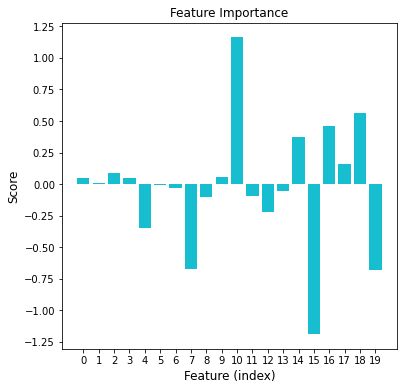

In [33]:
# LR - Feature Importance
LR_feature_importance = feature_importance(lr_clf)

# Show figure
plt.show()

In [34]:
# Predict test set results
# If lr_pred > 0.5, client has subscribed to a term deposit
lr_pred = lr_clf.predict(X_test)
lr_pred = (lr_pred > 0.5)

# print('lr_pred: y_test:')
# print(np.concatenate((lr_pred.reshape(len(lr_pred), 1),
#                       y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Print LR classification results
lr_scores = summarize_results(lr_pred, metric, 0.5)

Validation Accuracy: 91.588%
Validation ROC AUC: 71.478%

Confusion Matrix: 
[[7126  500]
 [ 193  419]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7319
           1       0.68      0.46      0.55       919

    accuracy                           0.92      8238
   macro avg       0.81      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238




-- Fold: 1 --

Accuracy Scoring:
Mean: 90.887%
Std: +/- 0.118%
Min: 90.725%
Max: 91.023%

ROC AUC Scoring:
Mean: 92.650%
Std: +/- 0.082%
Min: 92.543%
Max: 92.747%


-- Fold: 2 --

Accuracy Scoring:
Mean: 90.922%
Std: +/- 0.108%
Min: 90.758%
Max: 91.041%

ROC AUC Scoring:
Mean: 92.685%
Std: +/- 0.167%
Min: 92.498%
Max: 93.015%


-- Fold: 3 --

Accuracy Scoring:
Mean: 90.920%
Std: +/- 0.193%
Min: 90.653%
Max: 91.320%

ROC AUC Scoring:
Mean: 92.697%
Std: +/- 0.157%
Min: 92.381%
Max: 92.932%


-- Fold: 4 --

Accuracy Scoring:
Mean: 90.931%
Std: +/- 0.230%
Min: 90.577%
Max: 91.442%

ROC AUC Scoring:
Mean: 92.715%
Std: +/- 0.265%
Min: 92.327%
Max: 93.192%


-- Fold: 5 --

Accuracy Scoring:
Mean: 90.938%
Std: +/- 0.298%
Min: 90.477%
Max: 91.495%

ROC AUC Scoring:
Mean: 92.713%
Std: +/- 0.389%
Min: 91.877%
Max: 93.344%


-- Fold: 6 --

Accuracy Scoring:
Mean: 90.911%
Std: +/- 0.330%
Min: 90.421%
Max: 91.481%

ROC AUC Scoring:
Mean: 92.720%
Std: +/- 0.488%
Min: 91.837%
Max: 93.533%


-- Fold: 

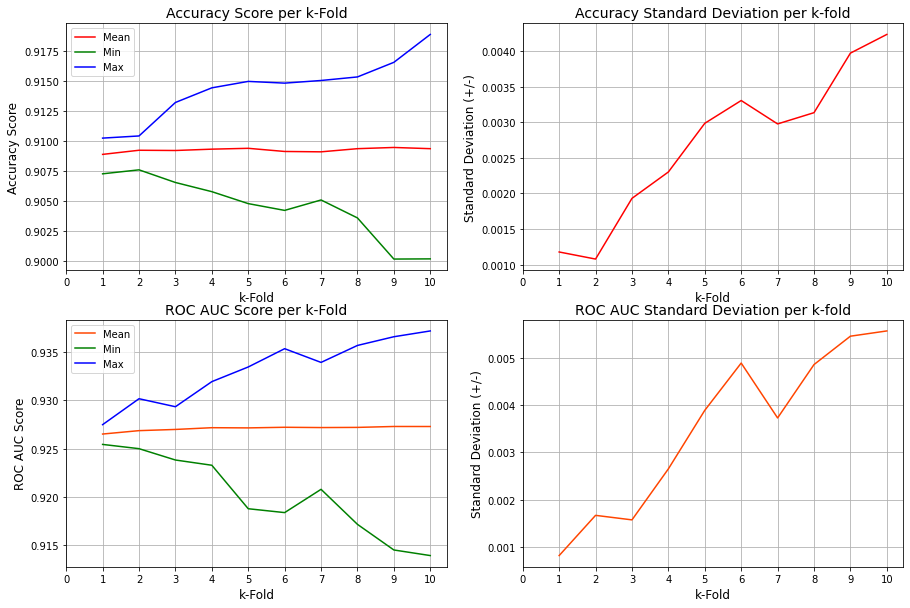

In [35]:
# Apply k-Fold Cross Validation on the training set
lr_cv = k_fold(lr_clf, 10)

<table border = "1">
  <thead>
    <th colspan = "3">Logistic Regression Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>Accuracy (%)</b></td>
      <td><b>ROC AUC (%)</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>90.935</td>
      <td>92.728</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.423</td>
      <td>0.556</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>90.017</td>
      <td>91.392</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>91.886</td>
      <td>93.717</td>
    </tr>
  </tbody>
</table>

In [36]:
# Apply Grid Search for parameter tuning

# lr_params = {'C': [0.1, 0.2, 0.25, 0.4, 0.5, 0.75, 0.9, 1],
#              'penalty': ['l1', 'l2'],
#              'class_weight': ['dict', 'balanced'],
#              'random_state': [0, 1]}

# Parameters dictionary
lr_params = {'C': [0.08],
             'penalty': ['l2'],
             'class_weight': ['dict'],
             'random_state': [0]}

# Perform Grid Search
if ((metric == "accuracy") or (metric == "roc_auc")):
  # Accuracy
  lr_grid_acc = GridSearchCV(lr_clf, lr_params, scoring='accuracy', cv=lr_cv, n_jobs=-1)
  results_acc = lr_grid_acc.fit(X_train, y_train)
  # Region of Convergence, Area Under Curve (ROC AUC)
  lr_grid_roc = GridSearchCV(lr_clf, lr_params, scoring='roc_auc', cv=lr_cv, n_jobs=-1)
  results_roc = lr_grid_roc.fit(X_train, y_train)

  # Summarize results
  best_accuracy = lr_grid_acc.best_score_
  best_roc_auc = lr_grid_roc.best_score_
  # Best scores
  print("\nBest Accuracy: %.3f%%" % (best_accuracy * 100))
  print("Best ROC AUC: %.3f%%" % (best_roc_auc * 100))

  # Best parameters
  if (metric == "accuracy"):
    # Accuracy
    best_parameters = lr_grid_acc.best_params_
    print("Best Parameters (Accuracy): ", best_parameters)
    print("")
  elif (metric == "roc_auc"):
    # Region of Convergence, Area Under Curve (ROC AUC)
    best_parameters = lr_grid_roc.best_params_
    print("Best Parameters (ROC AUC): ", best_parameters)
    print("")
else:
  # Invalid metric
  print("Invalid scoring metric!")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Best Accuracy: 90.935%
Best ROC AUC: 92.728%
Best Parameters (Accuracy):  {'C': 0.08, 'class_weight': 'dict', 'penalty': 'l2', 'random_state': 0}



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<table border = "1">
  <thead>
    <th colspan = "2">Logistic Regression Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td colspan="2"><b>Best Scores:</b></td>
    </tr>
    <tr>
      <td><b>Accuracy</b></td>
      <td>90.935%</td>
    </tr>
    <tr>
      <td><b>ROC AUC</b></td>
      <td>92.728%</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>C</b></td>
      <td>0.08</td>
    </tr>
    <tr>
      <td><b>class_weight</b></td>
      <td>'dict'</td>
    </tr>
    <tr>
      <td><b>penalty</b></td>
      <td>'l2'</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>0</td>
    </tr>
  </tbody>
</table>

### Decision Tree (DT)

In [37]:
# Define DT model
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=6, 
                             min_samples_leaf=2, min_samples_split=2, 
                             random_state=0)

# Train DT Model
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       random_state=0)

Feature: 0, Score: 0.00142
Feature: 1, Score: 0.00070
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00124
Feature: 4, Score: 0.00178
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00130
Feature: 8, Score: 0.02042
Feature: 9, Score: 0.00936
Feature: 10, Score: 0.49435
Feature: 11, Score: 0.00148
Feature: 12, Score: 0.02402
Feature: 13, Score: 0.00113
Feature: 14, Score: 0.00226
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.01758
Feature: 17, Score: 0.08892
Feature: 18, Score: 0.03236
Feature: 19, Score: 0.30168


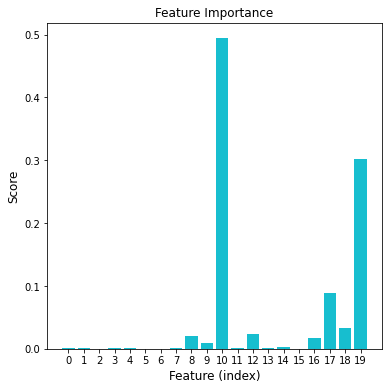

In [38]:
# DT - Feature Importance
DT_feature_importance = feature_importance(dt_clf)

# Show figure
plt.show()

In [39]:
# Predict test set results
# If dt_pred > 0.5, client has subscribed to a term deposit
dt_pred = dt_clf.predict(X_test)
dt_pred = (dt_pred > 0.5)

# print('dt_pred: y_test:')
# print(np.concatenate((dt_pred.reshape(len(dt_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Print DT classification results
dt_scores = summarize_results(dt_pred, metric, 0.5)

Validation Accuracy: 92.000%
Validation ROC AUC: 74.708%

Confusion Matrix: 
[[7097  437]
 [ 222  482]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7319
           1       0.68      0.52      0.59       919

    accuracy                           0.92      8238
   macro avg       0.81      0.75      0.77      8238
weighted avg       0.91      0.92      0.92      8238




-- Fold: 1 --

Accuracy Scoring:
Mean: 91.106%
Std: +/- 0.221%
Min: 90.701%
Max: 91.375%

ROC AUC Scoring:
Mean: 92.603%
Std: +/- 0.162%
Min: 92.481%
Max: 92.946%


-- Fold: 2 --

Accuracy Scoring:
Mean: 91.267%
Std: +/- 0.115%
Min: 91.114%
Max: 91.424%

ROC AUC Scoring:
Mean: 93.073%
Std: +/- 0.436%
Min: 92.451%
Max: 93.858%


-- Fold: 3 --

Accuracy Scoring:
Mean: 91.379%
Std: +/- 0.232%
Min: 91.004%
Max: 91.721%

ROC AUC Scoring:
Mean: 93.393%
Std: +/- 0.325%
Min: 92.940%
Max: 93.998%


-- Fold: 4 --

Accuracy Scoring:
Mean: 91.363%
Std: +/- 0.200%
Min: 91.047%
Max: 91.684%

ROC AUC Scoring:
Mean: 93.409%
Std: +/- 0.431%
Min: 92.799%
Max: 94.119%


-- Fold: 5 --

Accuracy Scoring:
Mean: 91.318%
Std: +/- 0.324%
Min: 90.768%
Max: 91.879%

ROC AUC Scoring:
Mean: 93.332%
Std: +/- 0.615%
Min: 92.278%
Max: 94.403%


-- Fold: 6 --

Accuracy Scoring:
Mean: 91.311%
Std: +/- 0.338%
Min: 90.504%
Max: 91.863%

ROC AUC Scoring:
Mean: 93.312%
Std: +/- 0.467%
Min: 92.546%
Max: 94.282%


-- Fold: 

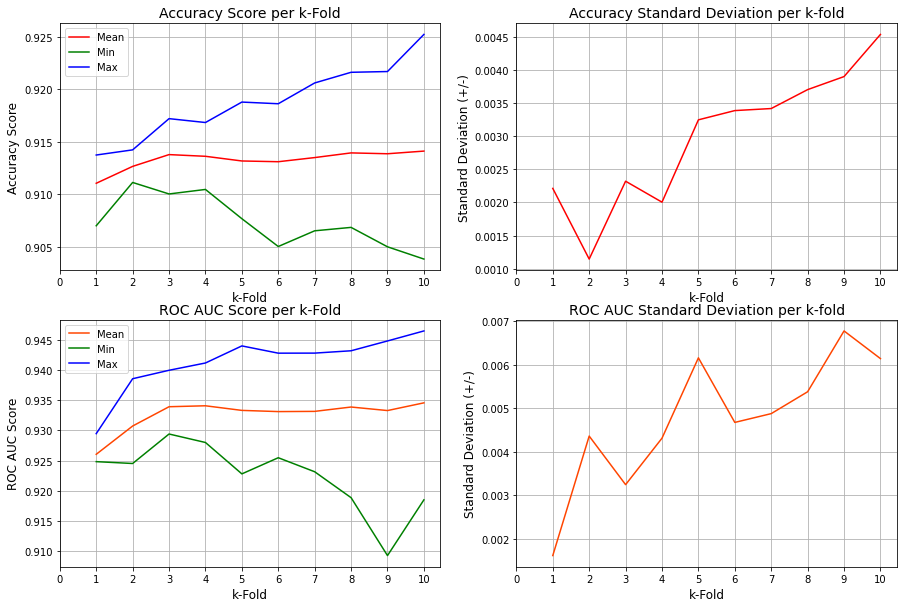

In [40]:
# Apply k-Fold Cross Validation on the training set
dt_cv = k_fold(dt_clf, 10)

<table border = "1">
  <thead>
    <th colspan = "3">Decision Tree Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>Accuracy (%)</b></td>
      <td><b>ROC AUC (%)</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>91.412</td>
      <td>93.458</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.453</td>
      <td>0.614</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>90.384</td>
      <td>91.847</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>92.523</td>
      <td>94.651</td>
    </tr>
  </tbody>
</table>

In [41]:
# Apply Grid Search for parameter tuning

# dt_params = {'criterion': ['gini', 'entropy'],
#            'max_depth': [5, 10, 25, 50],
#            'min_samples_leaf': [2, 5, 10],
#            'min_samples_split': [2, 5, 10],
#            'random_state': [0]}

# Parameters dictionary
dt_params = {'criterion': ['entropy'],
            'max_depth': [6],
            'min_samples_leaf': [2],
            'min_samples_split': [2],
            'random_state': [0]}

# Perform Grid Search
if ((metric == "accuracy") or (metric == "roc_auc")):
  # Accuracy
  dt_grid_acc = GridSearchCV(dt_clf, dt_params, scoring='accuracy', cv=dt_cv, n_jobs=-1)
  results_acc = dt_grid_acc.fit(X_train, y_train)
  # Region of Convergence, Area Under Curve (ROC AUC)
  dt_grid_roc = GridSearchCV(dt_clf, dt_params, scoring='roc_auc', cv=dt_cv, n_jobs=-1)
  results_roc = dt_grid_roc.fit(X_train, y_train)

  # Summarize results
  best_accuracy = dt_grid_acc.best_score_
  best_roc_auc = dt_grid_roc.best_score_
  # Best scores
  print("Best Accuracy: %.3f%%" % (best_accuracy * 100))
  print("Best ROC AUC: %.3f%%" % (best_roc_auc * 100))

  # Best parameters
  if (metric == "accuracy"):
    # Accuracy
    best_parameters = dt_grid_acc.best_params_
    print("Best Parameters (Accuracy): ", best_parameters)
  elif (metric == "roc_auc"):
    # Region of Convergence, Area Under Curve (ROC AUC)
    best_parameters = dt_grid_roc.best_params_
    print("Best Parameters (ROC AUC): ", best_parameters)
else:
  # Invalid metric
  print("Invalid scoring metric!")

Best Accuracy: 91.412%
Best ROC AUC: 93.458%
Best Parameters (Accuracy):  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


<table border = "1">
  <thead>
    <th colspan = "2">Decision Tree Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td colspan="2"><b>Best Scores:</b></td>
    </tr>
    <tr>
      <td><b>Accuracy</b></td>
      <td>91.412%</td>
    </tr>
    <tr>
      <td><b>ROC AUC</b></td>
      <td>93.458%</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>criterion</b></td>
      <td>'entropy'</td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>6</td>
    </tr>
    <tr>
      <td><b>min_samples_leaf</b></td>
      <td>2</td>
    </tr>
    <tr>
      <td><b>min_samples_split</b></td>
      <td>2</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>0</td>
    </tr>
  </tbody>
</table>

### LightGBM (LGB)

In [42]:
# Define LGB model
lgb_clf = LGBMClassifier(boosting_type='gbdt', max_depth=12, n_estimators=50, 
                     learning_rate=0.1, colsample_bytree=1, num_leaves=22, 
                     min_split_gain=2, max_samples=0.01, reg_alpha=1.22, 
                     reg_lambda=1.48, subsample=1, subsample_freq=1, 
                     random_state=0)

# Train LGB Model
lgb_clf.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=1, max_depth=12, max_samples=0.01,
               min_split_gain=2, n_estimators=50, num_leaves=22, random_state=0,
               reg_alpha=1.22, reg_lambda=1.48, subsample=1, subsample_freq=1)

Feature: 0, Score: 67.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 1.00000
Feature: 3, Score: 20.00000
Feature: 4, Score: 15.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 20.00000
Feature: 8, Score: 45.00000
Feature: 9, Score: 25.00000
Feature: 10, Score: 242.00000
Feature: 11, Score: 33.00000
Feature: 12, Score: 38.00000
Feature: 13, Score: 2.00000
Feature: 14, Score: 39.00000
Feature: 15, Score: 53.00000
Feature: 16, Score: 40.00000
Feature: 17, Score: 27.00000
Feature: 18, Score: 256.00000
Feature: 19, Score: 32.00000


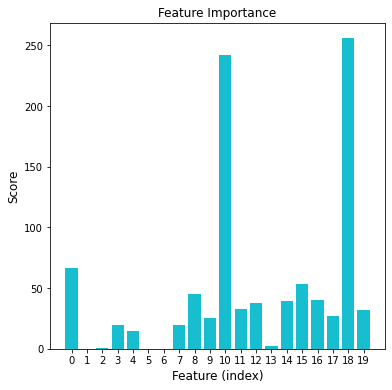

In [43]:
# LGB - Feature Importance
LGB_feature_importance = feature_importance(lgb_clf)

# Show figure
plt.show()

In [44]:
# Predict test set results
# If lgb_pred > 0.5, client has subscribed to a term deposit
lgb_pred = lgb_clf.predict(X_test)
lgb_pred = (lgb_pred > 0.5)

# print('lgb_pred: y_test:')
# print(np.concatenate((lgb_pred.reshape(len(lgb_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Print LGB classification results
lgb_scores = summarize_results(lgb_pred, metric, 0.5)

Validation Accuracy: 92.134%
Validation ROC AUC: 77.066%

Confusion Matrix: 
[[7060  389]
 [ 259  530]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      7319
           1       0.67      0.58      0.62       919

    accuracy                           0.92      8238
   macro avg       0.81      0.77      0.79      8238
weighted avg       0.92      0.92      0.92      8238




-- Fold: 1 --

Accuracy Scoring:
Mean: 91.497%
Std: +/- 0.144%
Min: 91.314%
Max: 91.727%

ROC AUC Scoring:
Mean: 94.751%
Std: +/- 0.060%
Min: 94.679%
Max: 94.872%


-- Fold: 2 --

Accuracy Scoring:
Mean: 91.559%
Std: +/- 0.109%
Min: 91.305%
Max: 91.678%

ROC AUC Scoring:
Mean: 94.824%
Std: +/- 0.097%
Min: 94.677%
Max: 95.014%


-- Fold: 3 --

Accuracy Scoring:
Mean: 91.648%
Std: +/- 0.220%
Min: 91.224%
Max: 92.084%

ROC AUC Scoring:
Mean: 94.887%
Std: +/- 0.171%
Min: 94.629%
Max: 95.169%


-- Fold: 4 --

Accuracy Scoring:
Mean: 91.691%
Std: +/- 0.152%
Min: 91.411%
Max: 91.958%

ROC AUC Scoring:
Mean: 94.901%
Std: +/- 0.158%
Min: 94.653%
Max: 95.182%


-- Fold: 5 --

Accuracy Scoring:
Mean: 91.639%
Std: +/- 0.220%
Min: 91.005%
Max: 92.116%

ROC AUC Scoring:
Mean: 94.915%
Std: +/- 0.269%
Min: 94.426%
Max: 95.355%


-- Fold: 6 --

Accuracy Scoring:
Mean: 91.679%
Std: +/- 0.331%
Min: 90.758%
Max: 92.203%

ROC AUC Scoring:
Mean: 94.923%
Std: +/- 0.343%
Min: 94.241%
Max: 95.516%


-- Fold: 

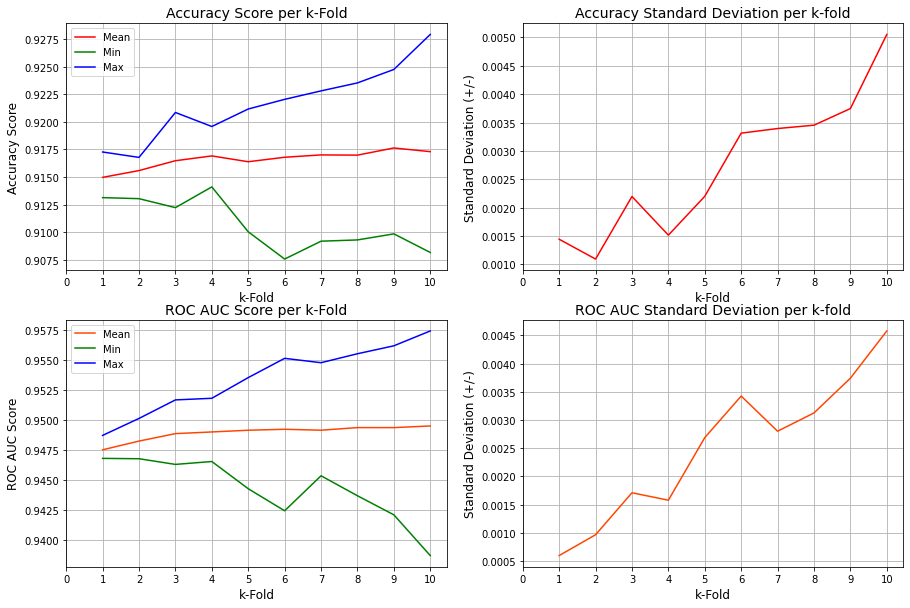

In [45]:
# Apply k-Fold Cross Validation on the training set
lgb_cv = k_fold(lgb_clf, 10)

<table border = "1">
  <thead>
    <th colspan = "3">LightGBM Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>Accuracy (%)</b></td>
      <td><b>ROC AUC (%)</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>91.730</td>
      <td>94.951</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.505</td>
      <td>0.458</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>90.818</td>
      <td>93.866</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>92.790</td>
      <td>95.746</td>
    </tr>
  </tbody>
</table>

In [46]:
# Apply Grid Search for parameter tuning

# lgb_params = {'boosting_type': ['gbdt'],
#               'max_depth': [10, 25, 50, 75, 100],
#               'n_estimators': [50, 100, 150, 200, 250],
#               'learning_rate': [0.01, 0.05, 0.1, 0.15],
#               'colsample_bytree': [0.2, 0.4, 0.6, 0.8, 1],
#               'num_leaves': [1, 5, 10, 20],
#               'min_split_gain': [2, 5, 10],
#               'max_samples': [0.2, 0.4, 0.6, 0.8, 1],
#               'reg_alpha': [0.5, 1, 1.5, 2, 5],
#               'reg_lambda': [0.5, 1, 1.5, 2, 5],
#               'subsample': [1, 1.5, 2, 5, 10],
#               'subsample_freq': [5, 10, 15, 20, 25],
#               'random_state': [0, 1, 2, 5, 10, 20, 40]}

# Parameters dictionary
lgb_params = {'boosting_type': ['gbdt'],
              'max_depth': [12],
              'n_estimators': [50],
              'learning_rate': [0.1],
              'colsample_bytree': [1],
              'num_leaves': [22],
              'min_split_gain': [2],
              'max_samples': [0.01],
              'reg_alpha': [1.22],
              'reg_lambda': [1.48],
              'subsample': [1],
              'subsample_freq': [1],
              'random_state': [0]}

# Perform Grid Search
if ((metric == "accuracy") or (metric == "roc_auc")):
  # Accuracy
  lgb_grid_acc = GridSearchCV(lgb_clf, lgb_params, scoring='accuracy', cv=lgb_cv, n_jobs=-1)
  results = lgb_grid_acc.fit(X_train, y_train)
  # Region of Convergence, Area Under Curve (ROC AUC)
  lgb_grid_roc = GridSearchCV(lgb_clf, lgb_params, scoring='roc_auc', cv=lgb_cv, n_jobs=-1)
  results = lgb_grid_roc.fit(X_train, y_train)

  # Summarize results
  best_accuracy = lgb_grid_acc.best_score_
  best_roc_auc = lgb_grid_roc.best_score_
  # Best scores
  print("Best Accuracy: %.3f%%" % (best_accuracy * 100))
  print("Best ROC AUC: %.3f%%" % (best_roc_auc * 100))

  # Best parameters
  if (metric == "accuracy"):
    # Accuracy
    best_parameters = lgb_grid_acc.best_params_
    print("Best Parameters (Accuracy): ", best_parameters)
  elif (metric == "roc_auc"):
    # Region of Convergence, Area Under Curve (ROC AUC)
    best_parameters = lgb_grid_roc.best_params_
    print("Best Parameters (ROC AUC): ", best_parameters)
else:
  # Invalid metric
  print("Invalid scoring metric!")

Best Accuracy: 91.730%
Best ROC AUC: 94.951%
Best Parameters (Accuracy):  {'boosting_type': 'gbdt', 'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 12, 'max_samples': 0.01, 'min_split_gain': 2, 'n_estimators': 50, 'num_leaves': 22, 'random_state': 0, 'reg_alpha': 1.22, 'reg_lambda': 1.48, 'subsample': 1, 'subsample_freq': 1}


<table border = "1">
  <thead>
    <th colspan = "2">LightGBM Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td colspan="2"><b>Best Scores:</b></td>
    </tr>
    <tr>
      <td><b>Accuracy</b></td>
      <td>91.730%</td>
    </tr>
    <tr>
      <td><b>ROC AUC</b></td>
      <td>94.951%</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>12</td>
    </tr>
    <tr>
      <td><b>n_estimators</b></td>
      <td>50</td>
    </tr>
    <tr>
      <td><b>learning_rate</b></td>
      <td>0.1</td>
    </tr>
    <tr>
      <td><b>colsample_bytree</b></td>
      <td>1</td>
    </tr>
    <tr>
      <td><b>num_leaves</b></td>
      <td>22</td>
    </tr>
    <tr>
      <td><b>min_split_gain</b></td>
      <td>2</td>
    </tr>
    <tr>
      <td><b>max_samples</b></td>
      <td>0.01</td>
    </tr>
    <tr>
      <td><b>reg_alpha</b></td>
      <td>1.22</td>
    </tr>
    <tr>
      <td><b>reg_lambda</b></td>
      <td>1.48</td>
    </tr>
    <tr>
      <td><b>subsample</b></td>
      <td>1</td>
    </tr>
    <tr>
      <td><b>subsample_freq</b></td>
      <td>1</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>0</td>
    </tr>
  </tbody>
</table>

## 4. Final Results

<table border = "1">
  <thead>
    <th colspan = "5">Final Classification Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b>Model</b></td>
      <td colspan = "2"><b>Accuracy (%)</b></td>
      <td colspan = "2"><b>ROC_AUC (%)</b></td>
    </tr>
    <tr>
      <td><b></b></td>
      <td><b>Pred.</b></td>
      <td><b>Val.</b></td>
      <td><b>Pred.</b></td>
      <td><b>Val.</b></td>
    </tr> 
    <tr>
      <td><b>Logistic Regression (LR)</b></td>
      <td>90.935</td>
      <td>91.588</td>
      <td>92.728</td>
      <td>71.478</td>
    </tr>
    <tr>
      <td><b>Decision Tree (DT)</b></td>
      <td>91.412</td>
      <td>92.000</td>
      <td>93.458</td>
      <td>74.708</td>
    </tr>
    <tr>
      <td><b>LightGBM (LGB)</b></td>
      <td>91.730</td>
      <td>92.134</td>
      <td>94.951</td>
      <td>77.066</td>
    </tr>
  </tbody>
</table>

## 5. Remarks

**Highlights:**

- CV Accuracy scores were at least 90%.
- Predicted and validated accuracy scores were relatively close to each other (but not too close to account for random statistical noise and interference).
- Utilized a combination of simple (e.g: Logistic Regression) and advanced (e.g: XGBoost) Machine Learning models to showcase a variety of results.

**Challenges Faced:**

- Random Forest and XGBoost models took significantly longer than expected to optimize (later removed).
- ROC AUC scores showed significant overfitting.

**Suggested Improvements:**

- For future projects, optimize simple Machine Learning models first.